In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
df = pd.read_csv('Machine Downtime 2.csv')
df.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [3]:
df.isna().sum()

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature                12
Hydraulic_Oil_Temperature(°C)      16
Spindle_Bearing_Temperature(°C)     7
Spindle_Vibration(µm)              11
Tool_Vibration(µm)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.isna().sum()

Date                               0
Machine_ID                         0
Assembly_Line_No                   0
Hydraulic_Pressure(bar)            0
Coolant_Pressure(bar)              0
Air_System_Pressure(bar)           0
Coolant_Temperature                0
Hydraulic_Oil_Temperature(°C)      0
Spindle_Bearing_Temperature(°C)    0
Spindle_Vibration(µm)              0
Tool_Vibration(µm)                 0
Spindle_Speed(RPM)                 0
Voltage(volts)                     0
Torque(Nm)                         0
Cutting(kN)                        0
Downtime                           0
dtype: int64

In [6]:
df.describe()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,101.184167,4.955532,6.499094,18.518774,47.616422,35.064763,1.007646,25.415098,20271.568249,349.101638,25.196960,2.785586
std,30.323683,1.000772,0.406355,8.360034,3.757603,3.764735,0.341260,6.455127,3853.673196,45.277313,6.151921,0.615749
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,3.469000,0.000000,202.000000,0.000000,1.800000
25%,76.220000,4.470511,6.218482,10.500000,45.100000,32.500000,0.777000,21.056000,17919.000000,319.000000,21.653830,2.270000
50%,96.165147,4.940503,6.505191,21.100000,47.700000,35.100000,1.007000,25.437000,20126.000000,349.000000,24.633746,2.770000
75%,126.302016,5.526438,6.780411,25.600000,50.100000,37.600000,1.233000,29.826000,22492.000000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,36.500000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


## First Moment Business Decision

In [7]:
NumCols = df.columns[3:-1]

In [8]:
print("Statistical Analysis")
for i in NumCols:
    print(f"The Mean Median and Mode of {i} -----> {df[i].mean()} , {df[i].median()} , {df[i].mode().values}")

Statistical Analysis
The Mean Median and Mode of Hydraulic_Pressure(bar) -----> 101.1841673404326 , 96.16514659 , [88.27913423]
The Mean Median and Mode of Coolant_Pressure(bar) -----> 4.955531733646787 , 4.940502941 , [4.5668539  6.83941316 6.86394412 6.89318192]
The Mean Median and Mode of Air_System_Pressure(bar) -----> 6.499093680495591 , 6.5051914 , [5.62871747 5.92864326 5.95523464 6.0114826  6.16754854 6.43007332
 6.75355968 6.83618804 6.87505751 6.94060631]
The Mean Median and Mode of Coolant_Temperature -----> 18.51877362452751 , 21.1 , [25.6 26.4]
The Mean Median and Mode of Hydraulic_Oil_Temperature(°C) -----> 47.61642167156657 , 47.7 , [48. 50.]
The Mean Median and Mode of Spindle_Bearing_Temperature(°C) -----> 35.06476270474591 , 35.1 , [34.6]
The Mean Median and Mode of Spindle_Vibration(µm) -----> 1.0076463670726585 , 1.007 , [1.231]
The Mean Median and Mode of Tool_Vibration(µm) -----> 25.415097858042838 , 25.437 , [26.736 30.585]
The Mean Median and Mode of Spindle_Spe

## Second Moment Business Decision

In [9]:
for col in NumCols:
    var = statistics.variance(df[col])
    stdev = statistics.pstdev(df[col])
    ranges = df[col].max() - df[col].min()
    print(f"The variance Standard deviation and range of {col} is {var} , {stdev} , {ranges}")

The variance Standard deviation and range of Hydraulic_Pressure(bar) is 919.5257670229945 , 30.317314754521167 , 205.32645418
The variance Standard deviation and range of Coolant_Pressure(bar) is 1.0015448733803483 , 1.000561958574449 , 11.025
The variance Standard deviation and range of Air_System_Pressure(bar) is 0.165124318304606 , 0.4062695748858565 , 2.9105114929999996
The variance Standard deviation and range of Coolant_Temperature is 69.89016420965699 , 8.358277988183605 , 32.4
The variance Standard deviation and range of Hydraulic_Oil_Temperature(°C) is 14.119583156572162 , 3.756814215561974 , 26.199999999999996
The variance Standard deviation and range of Spindle_Bearing_Temperature(°C) is 14.173232601230328 , 3.763944734263587 , 26.9
The variance Standard deviation and range of Spindle_Vibration(µm) is 0.11645842363070386 , 0.3411883820868028 , 2.461
The variance Standard deviation and range of Tool_Vibration(µm) is 41.66866203285675 , 6.4537711103518935 , 42.257
The variance

## Third Moment Business Decision

In [10]:
for col in NumCols:
    skew = df[col].skew()
    if skew == 0: 
        print(f"The {col} having skewness {skew} is Normal Distribution")
    elif skew > 0:
        print(f"The {col} having skewness {skew} is postive skewwed")
    else:
        print(f"The {col} having skewness {skew} is Negative skewed")

The Hydraulic_Pressure(bar) having skewness 0.20605060982820114 is postive skewwed
The Coolant_Pressure(bar) having skewness 0.15747404614215116 is postive skewwed
The Air_System_Pressure(bar) having skewness -0.05634082224985849 is Negative skewed
The Coolant_Temperature having skewness -0.22042919919530743 is Negative skewed
The Hydraulic_Oil_Temperature(°C) having skewness 0.006579317786342336 is postive skewwed
The Spindle_Bearing_Temperature(°C) having skewness -0.05701302477076695 is Negative skewed
The Spindle_Vibration(µm) having skewness -0.01111098535881387 is Negative skewed
The Tool_Vibration(µm) having skewness -0.05137755464070186 is Negative skewed
The Spindle_Speed(RPM) having skewness -0.18698777164732566 is Negative skewed
The Voltage(volts) having skewness -0.03508990804838767 is Negative skewed
The Torque(Nm) having skewness 0.03183402417740695 is postive skewwed
The Cutting(kN) having skewness 0.12115213181460814 is postive skewwed


## Fourth Moment Business Decision

In [11]:
l = p = 0
for col in NumCols:
    kurtosis = df[col].kurtosis()
    if kurtosis == 0: 
        print(f"The {col} having kurtosis {kurtosis} is Normal Distribution")
    elif kurtosis > 0:
        print(f"The {col} having kurtosis {kurtosis} is Leptokurtic Distribution")
        l+=1
    else:
        print(f"The {col} having kurtosis {kurtosis} is Platykurtic Distribution")
        p+=1

print(f"There are {l} leptokurtic distribution and {p} Platykurtic Distribution")

The Hydraulic_Pressure(bar) having kurtosis -0.9119852937835535 is Platykurtic Distribution
The Coolant_Pressure(bar) having kurtosis 1.1950756876870012 is Leptokurtic Distribution
The Air_System_Pressure(bar) having kurtosis 0.00665331327495311 is Leptokurtic Distribution
The Coolant_Temperature having kurtosis -1.3605498628658124 is Platykurtic Distribution
The Hydraulic_Oil_Temperature(°C) having kurtosis 0.051122645866970906 is Leptokurtic Distribution
The Spindle_Bearing_Temperature(°C) having kurtosis -0.0411162163043306 is Platykurtic Distribution
The Spindle_Vibration(µm) having kurtosis -0.010685728587827015 is Platykurtic Distribution
The Tool_Vibration(µm) having kurtosis -0.04753390564568205 is Platykurtic Distribution
The Spindle_Speed(RPM) having kurtosis 1.4316845495473287 is Leptokurtic Distribution
The Voltage(volts) having kurtosis -0.08282060494896992 is Platykurtic Distribution
The Torque(Nm) having kurtosis -0.4446378547183598 is Platykurtic Distribution
The Cuttin

## Correlation

In [12]:
NumDf = df.drop(columns=['Date','Machine_ID','Assembly_Line_No','Downtime'])

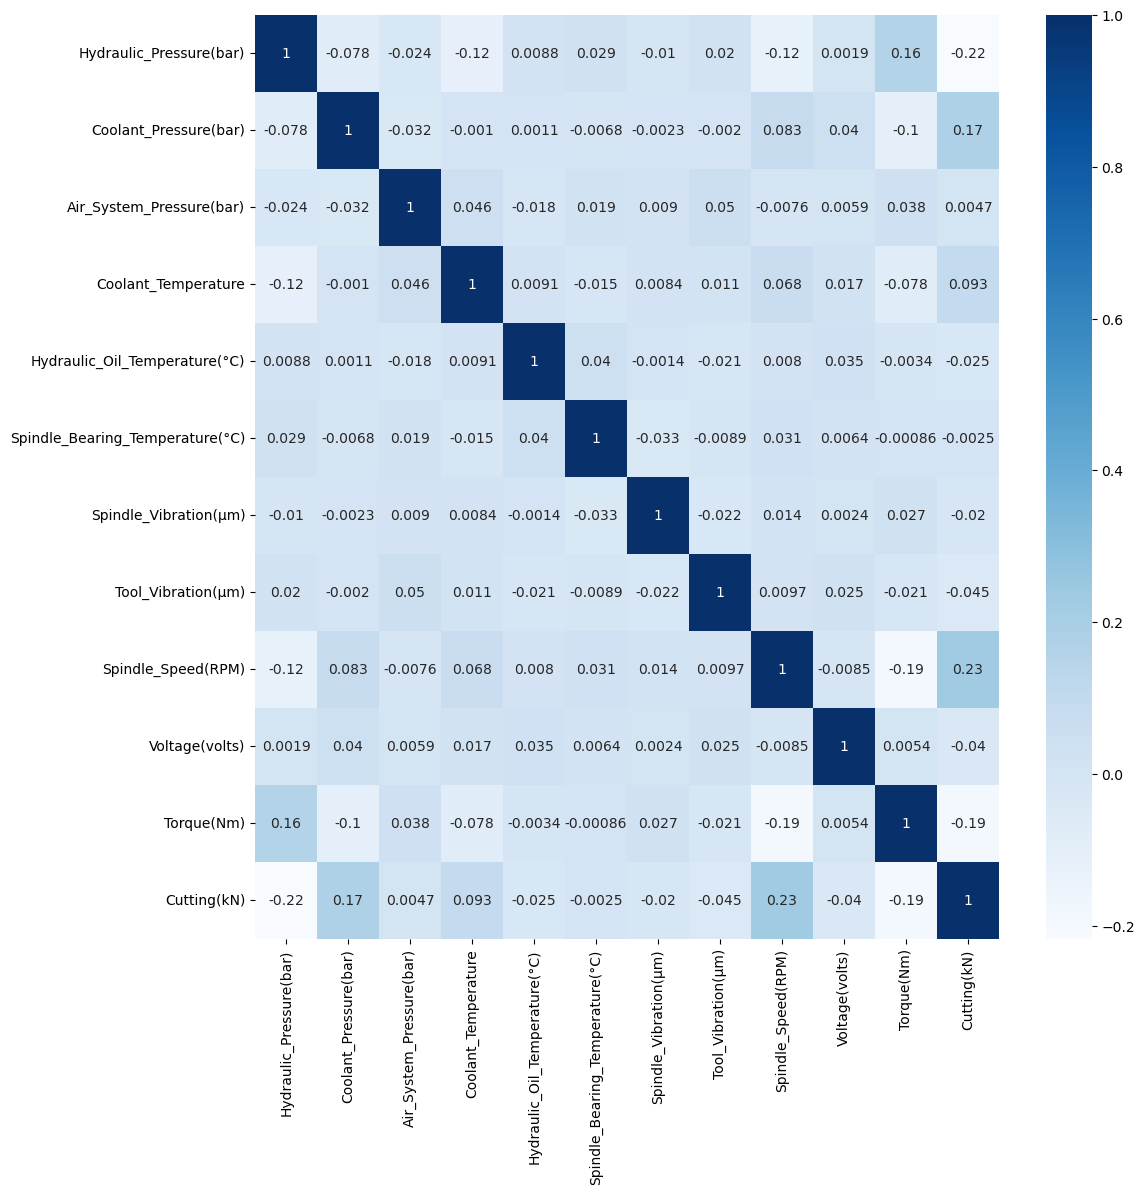

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(NumDf.corr() , annot = True , cmap = 'Blues')
plt.show()

## Frequency Distribution

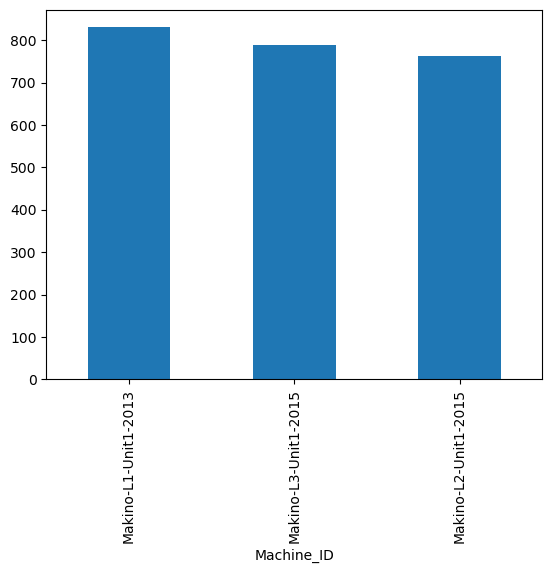

In [14]:
df['Machine_ID'].value_counts().plot(kind='bar')
plt.show()

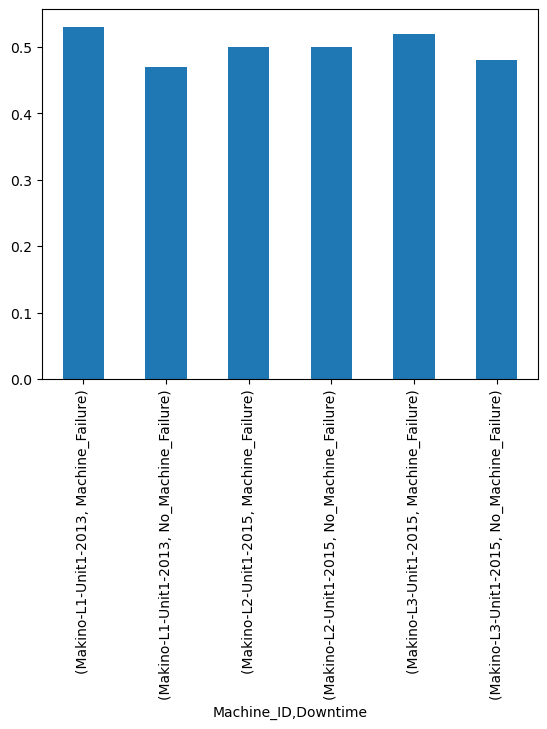

In [32]:
df.groupby('Machine_ID')['Downtime'].value_counts(normalize=True).plot(kind='bar')
plt.show()

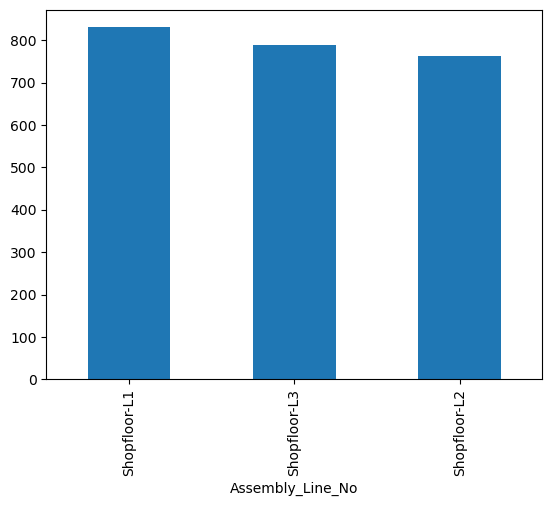

In [15]:
df['Assembly_Line_No'].value_counts().plot(kind='bar')
plt.show()

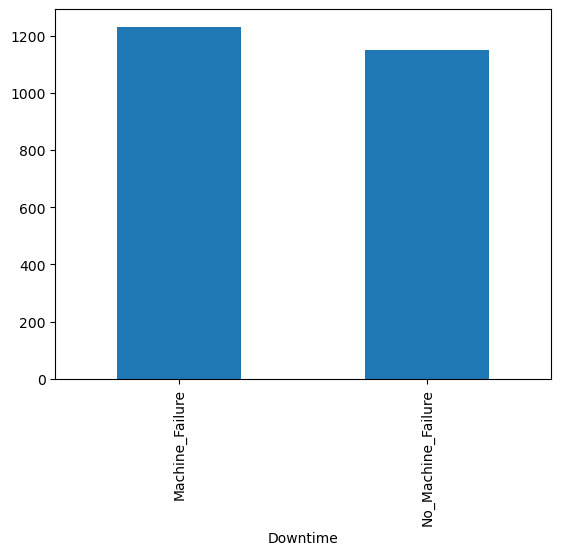

In [16]:
df['Downtime'].value_counts().plot(kind='bar')
plt.show()

## Box Plot

In [17]:
df.columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime'],
      dtype='object')

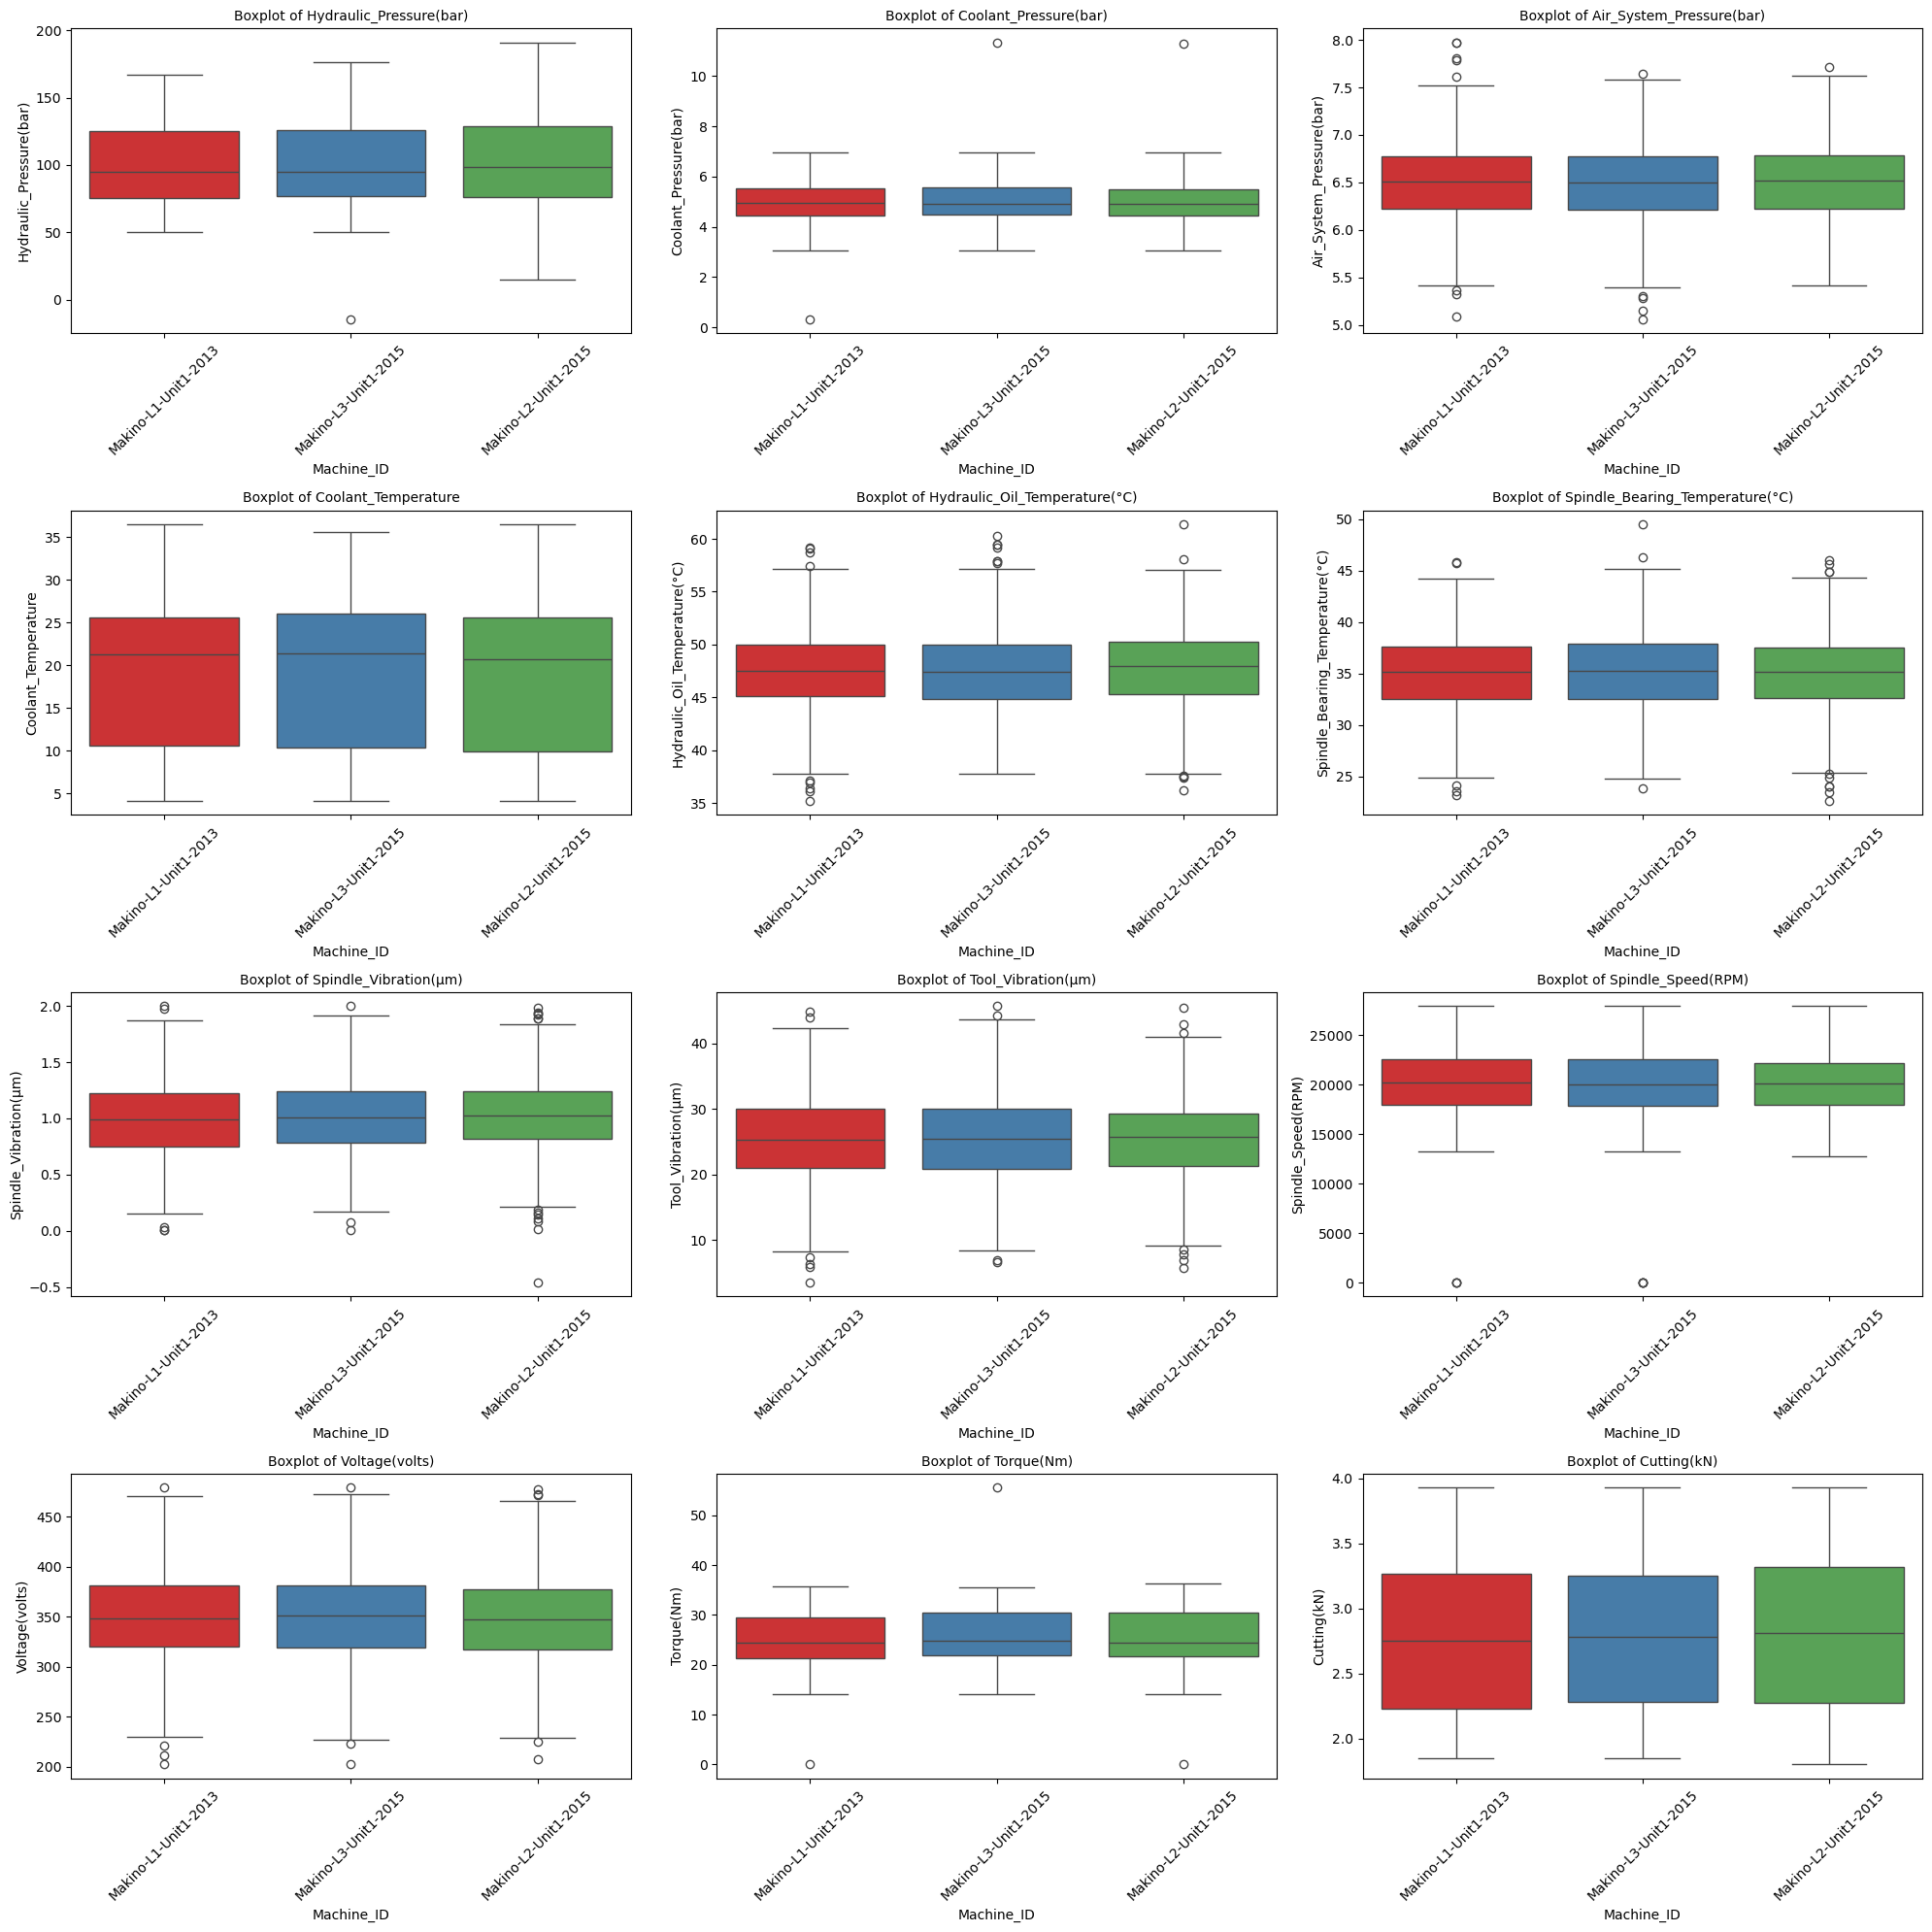

In [18]:
row = 4 
col = 3

fig, ax = plt.subplots(row, col, figsize=(20, 20))

axes = ax.flatten()

for index in range(len(NumCols)):
    sns.boxplot(ax=axes[index], x='Machine_ID', y=NumCols[index], hue='Machine_ID', data=df, palette='Set1',legend=False)
    axes[index].set_title(f'Boxplot of {NumCols[index]}' , fontsize = 10)

for ax in axes:
    ax.tick_params(axis = 'x' , rotation = 45)

plt.tight_layout()
plt.show()

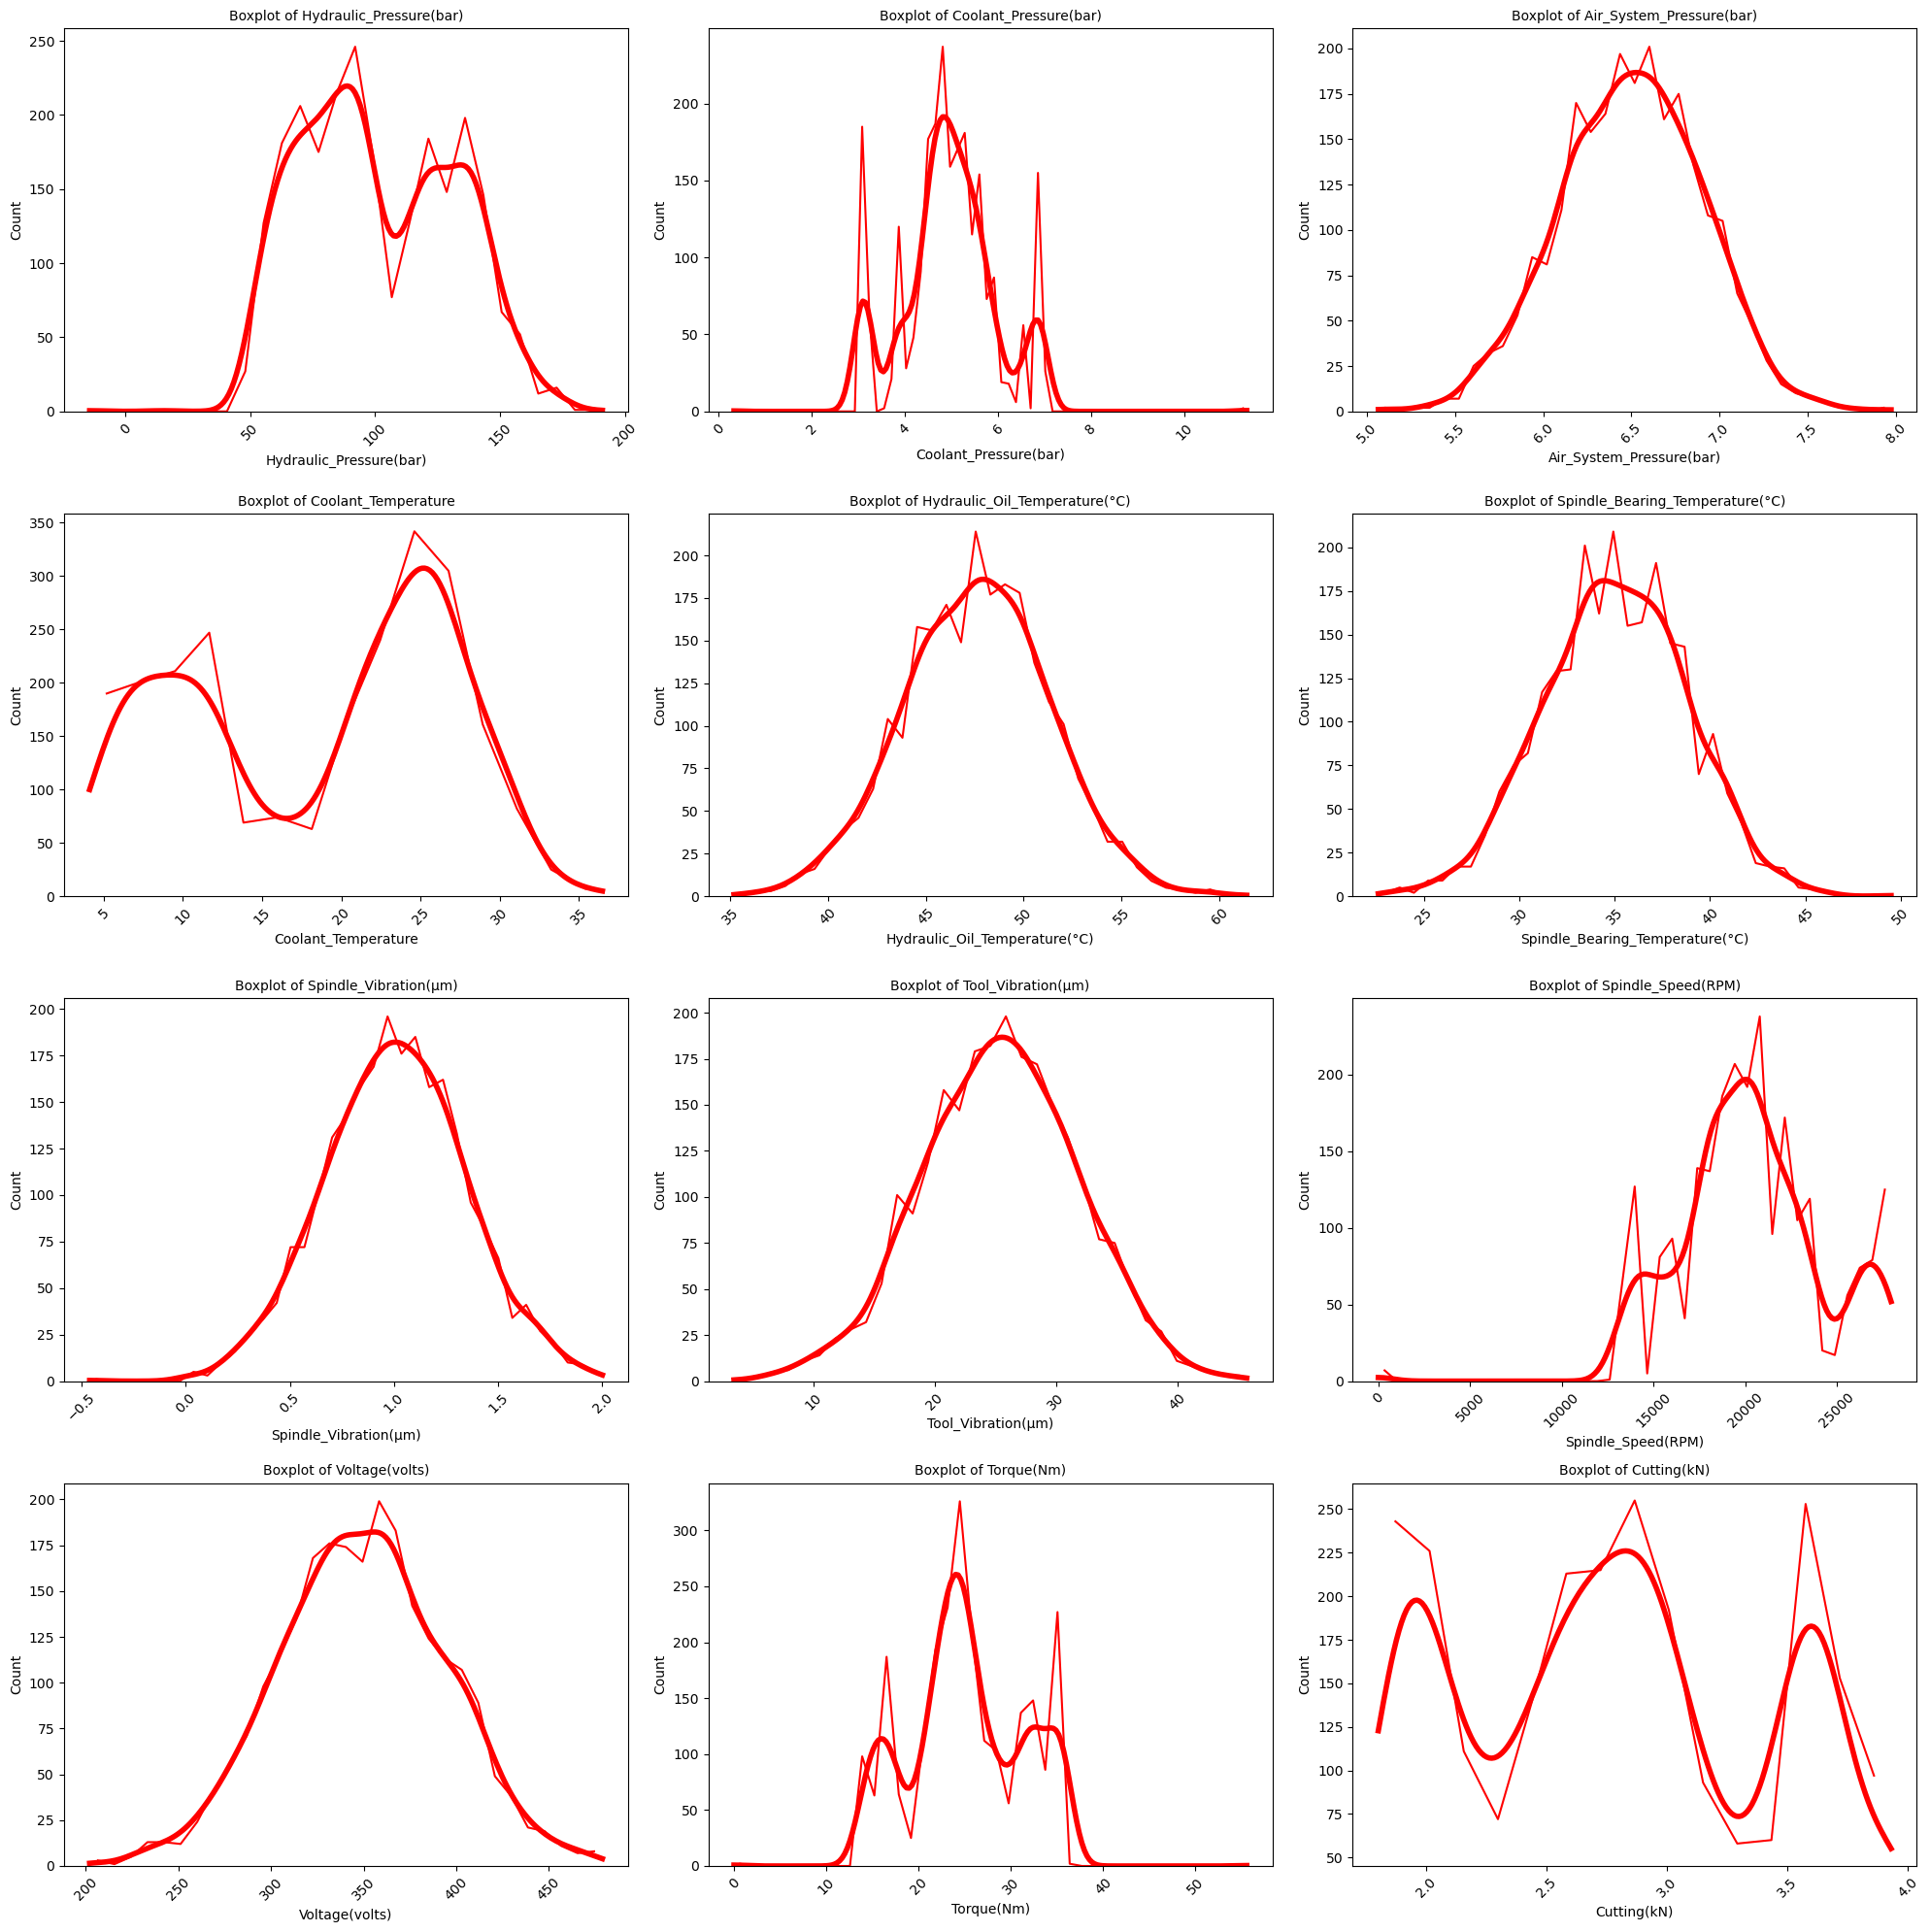

In [19]:
row = 4 
col = 3

fig, ax = plt.subplots(row, col, figsize=(20, 20))

axes = ax.flatten()

for index in range(len(NumCols)):
    sns.histplot(ax=axes[index], x=NumCols[index], data=df, legend=False , kde=True  , line_kws={'linewidth': 4} , color='red',
                   fill=False,element='poly')
    axes[index].set_title(f'Boxplot of {NumCols[index]}' , fontsize = 10)

for ax in axes:
    ax.tick_params(axis = 'x' , rotation = 45)

plt.tight_layout()
plt.show()